# Exploratory Data Analysis (EDA)


Lien vers la compétition : https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction

# Imports des librairies de bases

On ajoutera celles qui manquent au fur et à mesure de nos besoins

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os, gc
import seaborn as sns

# Définition de la seed pour le random

Très important pour qu'on voit les mêmes choses entre nos deux ordis

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Définition des paramètres pour Matplot

Rien de bien intéréssant

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set des variables globales

Attention, je n'utilise les variables globales pour la gestion des fichiers. Sinon, c'est mort

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "raw_data")
DATA_PROCESSED = os.path.join(PROJECT_ROOT_DIR, "processed_data")

# Fonction pour load les données

En vrai, on a juste besoin de pd.read_csv, mais c'était pour faire joli

In [5]:
def load_data(file,data_path=DATA_PATH, sep=','):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path, sep)

# On load les jeux de données

## Demographic data (traindemographics.csv)

Des données sur les paolos

In [6]:
train_demo = load_data(file = "train/traindemographics.csv")

In [7]:
train_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


### Performance data (trainperf.csv)

"This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer."

In [8]:
train_perf = load_data(file = "train/trainperf.csv")

### Previous loans data (trainprevloans.csv)

"This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer."

In [9]:
train_prev_loans = load_data(file = "train/trainprevloans.csv")

# Changement des catégories, et feature évident

## train_demo

### Vérification de la cléf primaire
#### customerid (Primary key used to merge to other data)

In [10]:
train_demo[train_demo['customerid'].duplicated(keep=False)].sort_values('customerid')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
1414,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
1928,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1090,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1996,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN
1520,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
4126,8a858f1e5baffcc9015bb02b505f180d,1983-04-06 00:00:00.000000,Savings,6.969350,4.818535,GT Bank,NaN,Permanent,NaN
3021,8a858f1e5baffcc9015bb02b505f180d,1983-04-06 00:00:00.000000,Savings,6.969350,4.818535,GT Bank,NaN,Permanent,NaN


24 doublons de clefs, mais c'est des lignes en double, on peut virer sans crainte

In [11]:
train_demo = train_demo.drop_duplicates(subset='customerid', keep='first', inplace=False)

### Changement de birthday

#### birthdate (date of birth of the customer)

In [12]:
# on le met en format "date_time" pour être plus simple à manipuler
train_demo["birthdate"] = pd.to_datetime(train_demo["birthdate"])

# Et on crée trois colonnes : Year, Month et Day
train_demo["birthdate_year"] = pd.to_datetime(train_demo["birthdate"]).dt.year
train_demo["birthdate_month"] = pd.to_datetime(train_demo["birthdate"]).dt.month
train_demo["birthdate_day"] = pd.to_datetime(train_demo["birthdate"]).dt.day

# on ne vire pas tout de suite la colonne initiale 'birthdate', on verra si elle est utile plus tard

### bank_account_type

#### bank_account_type (type of primary bank account)

In [13]:
train_demo["bank_account_type"].value_counts()

Savings    3414
Other       864
Current      56
Name: bank_account_type, dtype: int64

Ok, 56 comptes courants face aux 3414 de comptes épargnes, on va la rentrer dans "Other", pas la peine de garder cette cardinalité pour cette variable

In [14]:
train_demo["bank_account_type"] = train_demo["bank_account_type"].replace("Current", "Other")

In [15]:
train_demo["bank_account_type"].value_counts()

Savings    3414
Other       920
Name: bank_account_type, dtype: int64

### longitude_gps & latitude_gps

Voyons à quoi ça ressemble à la base

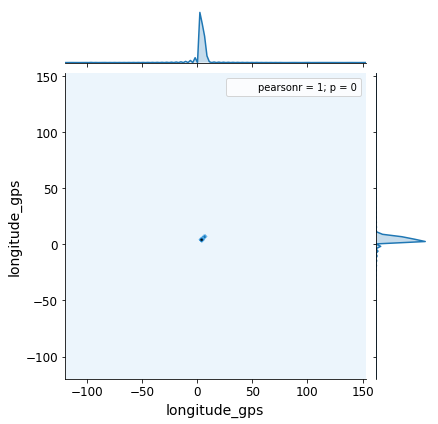

In [16]:
sns.jointplot(x="longitude_gps", y="longitude_gps", data=train_demo, kind="kde")

Ok, ça ressemble à rien, des outliers m'écrasent les données autour de 0

In [17]:
train_demo["longitude_gps"].describe()

count    4334.000000
mean        4.624000
std         7.194031
min      -118.247009
25%         3.354857
50%         3.591668
75%         6.543691
max       151.209290
Name: longitude_gps, dtype: float64

Hou les jolis outliers : la moyenne est à 4 (std 7), mais les -118 et 151 semblent être des erreurs. On les remplace par des valeurs vides

In [18]:
train_demo["longitude_gps"] = train_demo["longitude_gps"] \
                                .where(train_demo["longitude_gps"] < 20)\
                                .where(train_demo["longitude_gps"] > -20)

In [19]:
train_demo["latitude_gps"].describe()

count    4334.000000
mean        7.249975
std         3.056594
min       -33.868818
25%         6.470610
50%         6.621730
75%         7.425021
max        71.228069
Name: latitude_gps, dtype: float64

Pareil pour ce Pépito

In [20]:
train_demo["latitude_gps"] = train_demo["latitude_gps"]\
                            .where(train_demo["latitude_gps"] < 20)\
                            .where(train_demo["latitude_gps"] > -20)

Faisons un peu de dataviz pour voir le résultat

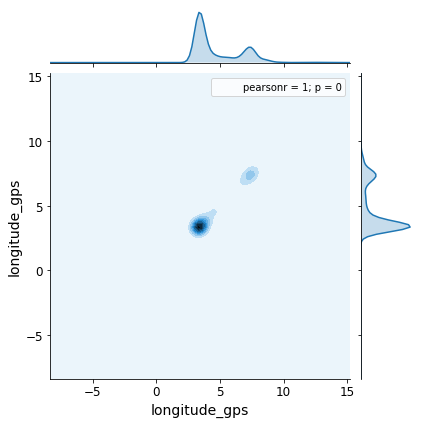

In [21]:
sns.jointplot(x="longitude_gps", y="longitude_gps", data=train_demo, kind="kde")

Et bien voilà, ça c'est joli à voir, allez, on passe à la suite

### bank_name_clients

In [22]:
train_demo["bank_name_clients"].value_counts()

GT Bank               1594
First Bank             588
Access Bank            431
UBA                    351
Zenith Bank            301
Diamond Bank           282
EcoBank                150
Stanbic IBTC           144
FCMB                   121
Fidelity Bank          103
Skye Bank              101
Sterling Bank           54
Wema Bank               28
Union Bank              23
Heritage Bank           22
Keystone Bank           19
Standard Chartered      15
Unity Bank               7
Name: bank_name_clients, dtype: int64

Ok, là, les noms ne serviront à rien à l'algo, et les remplacer par des numériques n'a aucun sens, et j'ai pas envie de binariser cette variable, la cardinalité est trop grande. Donc on va chercher à caracteriser cette variable avec des données externes, comme les ratios de liquidité, blablabla (merci à HB)

In [23]:
Liquidity_Ratio = load_data(file = "external_data/Nigerian_Banks_Liquidity_Ratio_Efficiency_Ratio_and_Profitability.csv", sep=";")

In [24]:
Liquidity_Ratio.head()

,S_N,Bank,Return_On_Equity,Return_On_Asset,Current_Ratio,Liquid_to_asset_Ratio,Loan_to_Deposit,Cash_to_Deposit,Loan_to_Asset
0,1,First Bank,0.10,0.013,1.12,0.96,0.89,0.08,0.65
1,2,UBA,0.10,0.009,1.04,0.93,0.49,0.33,0.34
2,3,Zenith Bank,0.09,0.030,1.12,0.93,0.64,0.14,0.47
3,4,GT Bank,0.24,0.040,0.99,0.82,0.71,0.32,0.47
4,5,Access Bank,0.04,0.003,1.14,0.91,0.66,0.09,0.47


Voilà, on va merger ça avec le dataset de base, en utilisant comme clef primaire le nom des banques.

In [25]:
train_demo = pd.merge(train_demo, Liquidity_Ratio, how = 'left', left_on = 'bank_name_clients', right_on = 'Bank')

In [26]:
train_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4334 entries, 0 to 4333
Data columns (total 21 columns):
customerid                    4334 non-null object
birthdate                     4334 non-null datetime64[ns]
bank_account_type             4334 non-null object
longitude_gps                 4311 non-null float64
latitude_gps                  4307 non-null float64
bank_name_clients             4334 non-null object
bank_branch_clients           51 non-null object
employment_status_clients     3686 non-null object
level_of_education_clients    586 non-null object
birthdate_year                4334 non-null int64
birthdate_month               4334 non-null int64
birthdate_day                 4334 non-null int64
S_N                           4157 non-null float64
Bank                          4157 non-null object
Return_On_Equity              4157 non-null float64
Return_On_Asset               4157 non-null float64
Current_Ratio                 4157 non-null float64
Liquid_to_asset_Ra

Flûte, des lignes n'ont pas eu de copines dans la dataframe "Liquidity_Ratio"

Vérifions qui c'est

In [27]:
train_demo[train_demo["Current_Ratio"].isnull()]["bank_name_clients"].unique()

array(['FCMB', 'Standard Chartered', 'Heritage Bank', 'Keystone Bank'],
      dtype=object)

Yes, ces 4 banques n'existent pas dans la base Liquidity_Ratio, on remplira les missing values plus tard

In [ ]:
train_demo.info()

In [ ]:
train_demo.head()

## train_perf

In [ ]:
train_perf.head()

In [ ]:
train_perf.info()

## train_prev_loans

In [ ]:
train_prev_loans.head()

In [ ]:
train_prev_loans.info()

# Bouts de codes inutiles

In [ ]:
banks_total_assets={'Access Bank':12200000000,
                    'Diamond Bank': 7300000000,
                    'EcoBank': 8100000000,
                    'FCMB': 3700000000,
                    'Fidelity Bank': 4200000000,
                    'First Bank': 12420329012,
                    'GT Bank': 8693261120,
                    'Heritage Bank': 1700000000,
                    'Keystone Bank': 1916000000,
                    'Skye Bank': 3900000000,
                    'Stanbic IBTC': 3906465440,
                    'Standard Chartered': 663501000,
                    'Sterling Bank': 2294360688,
                    'UBA': 11006397601,
                    'Union Bank': 41000000,
                    'Unity Bank': 245000000,
                    'Wema Bank': 1158184,
                    'Zenith Bank': 13039410249
                   }

train_demo["bank_total_assets"] = train_demo["bank_name_clients"].map(banks_total_assets)

# ATTENTION, TOUT CE QUI EN BAS EST LE CODE D'UNE AUTRE DE MES COMPETITIONS QUE J'UTILISE POUR COPIER COLLER

# Jointure entre les X et Y

In [ ]:
# Merge de TX_data et STA_data en utilisant les index comme cléf primaire
TX_data = pd.merge(TX_data, STA_data, left_index=True, right_index=True)

# On drop les ID qui sont crée dans le processus
TX_data.drop(["ID_y","ID_x"],inplace=True,axis=1)

# On applique tout ce qui peut l'être en numérique
TX_data=TX_data.apply(pd.to_numeric, errors='ignore')

del STA_data #Je supprime toujours les variables inutiles pour liberer ma RAM (qui est très faible)

In [ ]:
TX_data.info()

In [ ]:
TX_data.SHIPPING_MODE = TX_data.SHIPPING_MODE.astype('category')
TX_data.PRICECLUB_STATUS = TX_data.PRICECLUB_STATUS.astype('category')
TX_data.SELLER_COUNTRY = TX_data.SELLER_COUNTRY.astype('category')
TX_data.PRODUCT_TYPE = TX_data.PRODUCT_TYPE.astype('category')
TX_data.PRODUCT_FAMILY = TX_data.PRODUCT_FAMILY.astype('category')

In [ ]:
def b( row):
            return 0 if row['CLAIM_TYPE'] == '-' else 1;

In [ ]:
TX_data['IS_CLAIM'] = TX_data.apply(b, axis=1)

# DATA VIZ : Analyse des tendances centrales

In [ ]:
def simple_describer_categorial(data, target):
    X=data.copy()
    print(target+" DESCRIBE    ____________________________________________\n")
    print(X[target].describe());
    print("\n\n"+target+" STAT ____________________________________________\n")
    temp=X['IS_CLAIM'].groupby(TX_data[target]).describe().reset_index()
    temp.columns=[target,"count","mean","std","t_1","t_2","t_3","t_4","t_5"]
    temp.drop(["t_1","t_2","t_3","t_4","t_5"], axis=1, inplace=True)
    temp.sort_values(by="mean",ascending=False, inplace=True)
    print(temp)
    print("\n\n"+target+" MEAN     _____________________________________________\n")
    sns.barplot(y=target, 
              x="mean", 
              data=temp, 
              palette="Greens_d")

In [ ]:
def simple_describer_bool(data, target):
    X=data.copy()
    print(target+" DESCRIBE    ____________________________________________\n")
    print(X[target].describe());
    print("\n\n"+target+" STAT ____________________________________________\n")
    temp=X['IS_CLAIM'].groupby(TX_data[target]).describe().reset_index()
    temp.columns=[target,"count","mean","std","t_1","t_2","t_3","t_4","t_5"]
    temp.drop(["t_1","t_2","t_3","t_4","t_5"], axis=1, inplace=True)
    temp.sort_values(by="mean",ascending=False, inplace=True)
    print(temp)
    print("\n\n"+target+" MEAN     _____________________________________________\n")
    sns.barplot(y="mean",
              data=temp, 
              palette="Greens_d")

### SHIPPING_MODE           99685 non-null object

In [ ]:
simple_describer_categorial(TX_data, "SHIPPING_MODE")

#### Analyse:
Je ne comprends pas pourquoi cette légère tendance.

Aller chercher son colis, ou se le faire livrer chez soi ne semble pas apporter quelque chose

### SHIPPING_PRICE          32390 non-null object

In [ ]:
simple_describer_categorial(TX_data, "SHIPPING_PRICE")

#### Analyse:

Il semble que des frais d'envois chers créent des claims. Mais c'est peût être pas significatif, en effet, il y a quand même peu de vente avec des frais chers

### WARRANTIES_FLG          100000 non-null bool

In [ ]:
simple_describer_bool(TX_data, "WARRANTIES_FLG")

#### Analyse:

Avoir une garantie semble ajouter légèrement de la proba de claims

### WARRANTIES_PRICE        3397 non-null object


In [ ]:
simple_describer_categorial(TX_data, "WARRANTIES_PRICE")

#### Analyse:

C'est pas clair pourquoi soit les toutes petites ou soit les très grosses sont si faibles. En revanche avoir une garantie donne tendance à faire une Claim.

Ou pourrait transformer ça en variable binaire : 50<100 et 20<50 et 5<20 à 1, les deux autres à 0

### CARD_PAYMENT            100000 non-null int64

In [ ]:
TX_data.CARD_PAYMENT=TX_data.CARD_PAYMENT.astype('bool')

In [ ]:
simple_describer_bool(TX_data, "CARD_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD si faible? Ca dégage

### COUPON_PAYMENT          100000 non-null int64


In [ ]:
TX_data.COUPON_PAYMENT=TX_data.COUPON_PAYMENT.astype('bool')

In [ ]:
simple_describer_bool(TX_data, "COUPON_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD si faible? Ca dégage

### RSP_PAYMENT             100000 non-null int64


In [ ]:
TX_data.RSP_PAYMENT=TX_data.RSP_PAYMENT.astype('bool')

In [ ]:
simple_describer_bool(TX_data, "RSP_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD si faible? Ca dégage

### WALLET_PAYMENT          100000 non-null int64


In [ ]:
TX_data.WALLET_PAYMENT=TX_data.WALLET_PAYMENT.astype('bool')

In [ ]:
simple_describer_bool(TX_data, "WALLET_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD inexistante? Ca dégage

### PRICECLUB_STATUS        99943 non-null object


In [ ]:
simple_describer_categorial(TX_data, "PRICECLUB_STATUS")

#### Analyse:

Franchement, je pense que ce n'est qu'une bête variation statistique cet effet. Tout le monde est autour de 50%

### REGISTRATION_DATE       100000 non-null int64


In [ ]:
sns.distplot(TX_data.REGISTRATION_DATE);

#### Analyse:

Beaucoup de nouveaux arrivants

In [ ]:
simple_describer_categorial(TX_data, "REGISTRATION_DATE")

#### Analyse

J'ai envie de dire que plus tu es un vieux client, moins tu te plains

### PURCHASE_COUNT          100000 non-null object


In [ ]:
simple_describer_categorial(TX_data, "PURCHASE_COUNT")

#### Analyse:

Moins la personne a acheté, plus elle va péter les bonbons. Attention, cette variable doit être mille fois colinéaire avec la date d'entrée

### BUYER_BIRTHDAY_DATE     94164 non-null float64


In [ ]:
simple_describer_categorial(TX_data, "BUYER_BIRTHDAY_DATE")

In [ ]:
sns.distplot(TX_data.BUYER_BIRTHDAY_DATE.fillna(1900, inplace=False));

#### Analyse

Classique, des données manquantes (mes 1900), et des données abhérantes comme des gars trés jeunes (2 ans les pépères).

Mais en moyenne, c'est des vieux croutons qui se promènent sur le site (1976)

In [ ]:
simple_describer_categorial(TX_data, "BUYER_BIRTHDAY_DATE")

### BUYER_DEPARTMENT        100000 non-null int64


In [ ]:
simple_describer_categorial(TX_data, "BUYER_DEPARTMENT")

In [ ]:
temp=TX_data['IS_CLAIM'].groupby(TX_data["BUYER_DEPARTMENT"]).describe()

In [ ]:
! pip install pygal_maps_fr

In [ ]:
from IPython.display import SVG, HTML
import pygal
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

line_chart = pygal.Line()
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Some departments'
fr_chart.add("mean",temp["mean"].to_dict())
fr_chart.render()
HTML(html_pygal.format(pygal_render=fr_chart.render()))

In [ ]:
del temp

### BUYING_DATE             100000 non-null object


In [ ]:
simple_describer_categorial(TX_data, "BUYING_DATE")

#### Analyse:

Variable à virer, c'est clair

### SELLER_SCORE_COUNT      99994 non-null object


In [ ]:
simple_describer_categorial(TX_data, "SELLER_SCORE_COUNT")

#### Analyse:

A notre grande surprise : les vendeurs bien notés ont moins de chance de faire des claims

### SELLER_SCORE_AVERAGE    99994 non-null float64


In [ ]:
simple_describer_categorial(TX_data, "SELLER_SCORE_AVERAGE")

### SELLER_COUNTRY          100000 non-null object


In [ ]:
simple_describer_categorial(TX_data, "SELLER_COUNTRY")

#### Analyse:

Quelques pays à problèmes, mais pas forcément significatif à cause du faible nombre de ventes de certains.

Exemple : La grèce : une vente => une claim

### SELLER_DEPARTMENT       100000 non-null int64


In [ ]:
simple_describer_categorial(TX_data, "SELLER_DEPARTMENT")

In [ ]:
temp=TX_data['IS_CLAIM'].groupby(TX_data["SELLER_DEPARTMENT"]).describe()

In [ ]:
from IPython.display import SVG, HTML
import pygal
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

line_chart = pygal.Line()
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'SELLER_DEPARTMENT'
fr_chart.add("mean",temp["mean"].to_dict())
fr_chart.render()
HTML(html_pygal.format(pygal_render=fr_chart.render()))


In [ ]:
del temp

### Analyse

On remercie les Hautes Pyrénées qui ne font pas chier le monde : 18% de claims

Et la Sarthe qui ne va pas du tout

Des valeurs abhérantes comme d'habitude (les -1)

### PRODUCT_TYPE            100000 non-null object


In [ ]:
simple_describer_categorial(TX_data, "PRODUCT_TYPE")

### Analyse

Houuuu la belle dstribution jolie, il y a peût être une transformation judicieuse à faire. Dans tout les cas on garde

### PRODUCT_FAMILY          100000 non-null object


In [ ]:
simple_describer_categorial(TX_data, "PRODUCT_FAMILY")

### Analyse

On voit clairement des zones à problème

### ITEM_PRICE              100000 non-null object


In [ ]:
simple_describer_categorial(TX_data, "ITEM_PRICE")

### Analyse

Les petits montants font moins de claims. Logique

## Bilan

On voit clairement des trucs qui peuvent juste être flag "A Risque" comme les types de produits, ou les pays

Je propose de virer déjà les types de paiement. Ils ne se différentient pas entre eux.

Ainsi que la "BUYING_DATE", elle ne semble apporter rien du tout

In [ ]:
TX_data.drop(['CARD_PAYMENT','COUPON_PAYMENT','RSP_PAYMENT','WALLET_PAYMENT', "BUYING_DATE"], axis = 1, inplace = True)

## Corrélation entre les variables numériques

In [ ]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(TX_data.apply(pd.to_numeric, errors='ignore').select_dtypes(exclude=['object']).astype(float).corr(method='spearman'),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=True)

#### Analyse

Quelques corrélations linéaires:
1. Entre les dates de registration et d'anniversaire
2. Le score des vendeurs en fonction du département
3. Le score du vendeur et le taux de claim (logique)

La règle tacite est que:
* Une corélation en dessous de 0.10 n'est rien
* Entre 0.10 et 0.25 : Faible
* Moyenne entre 0.25 et 0.50
* Forte au dessus

Test de Spearman à vérifier les conditions initiales

In [ ]:
cat_columns = TX_data.select_dtypes(['category']).columns
cat_columns
TX_data[cat_columns] = TX_data[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(TX_data.apply(pd.to_numeric, errors='ignore').select_dtypes(exclude=['object']).astype(float).corr(method='spearman'),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=True)

### Analyse:

Cool! Je ne vois rien

D'après le cours suivant, il faut bien dégager les variables corrélées pour utiliser des arbres de décisions (modèles linéaires, c'est évident) : http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/ml_ccc_machine_learning_interpretabilite.html

C'est pour ça que j'ai immédiatement dégagé la variable XXX_MAX que je construisait en même temps que XXX_MIN dans Splitter.

Et là, il faut choisir quoi virer